<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WK9/blob/main/Spam_mail_naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Spam Mail Using Naive Bayes Classification  
  
## Overview
**i. Understanding the context**  
Spam messages often come from illegitimate email addresses, and may contain explicit or illegal content. These emails often use scare tactics, contain typos and misleading information, and are sent in bulk from an anonymous sender. They seldom contain an unsubscribe links, and if they do, the links may be embedded with malware. This could lead to cybercriminals gaining access to ones computer, smartphone, and other devices. We would like to build a model that identifies spam mails in the effort of preventing their prevalence.
  
**ii. Specifying the objectives**  
The specific objective of this project are:  
> To build a model that determines whether or not a mail is spam or ham

**iii. Defining the metric for success**  
The project will be considered successful when the model has an accuracy score and recall score of 85% and above.   

**iv. Data relevance**  
We have retrieved a dataset with relevant data on the characteristics of different mails from https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**v. Project design**  
In order to work on the above problem, we need to do the following:

a. Acquire the dataset with appropriate data for our project  
b. Perform data cleaning by dropping irrelevant data, finding and dealing with duplicates, missing data, and anomalies   
c. Perform descriptive analysis to gain insights on the given data  
d. Build a gaussian naive bayes classification model  
e. Challenging the solution
f. Give conclusions and recommendations 

## Importing libraries

In [94]:
# Import relevant libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [3]:
# Disable future warnings by running this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [4]:
# Set all float results in a dataframe to have only two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Loading datasets

In [5]:
# Load the csv file into a pandas dataframe
names = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
        'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail', 'word_freq_receive','word_freq_will',
        'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
         'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
         'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[',
         'char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest',
         'capital_run_length_total','spam']

mail  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',names = names)

## Reading the datasets

In [6]:
# Preview the first five rows of the dataset
mail.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.78,0.00,0.00,3.76,61,278,1
1,0.21,0.28,0.50,0.00,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.00,0.43,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.13,0.00,0.37,0.18,0.05,5.11,101,1028,1
2,0.06,0.00,0.71,0.00,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.00,1.16,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.12,0.00,0.06,0.06,0.00,0.00,0.01,0.14,0.00,0.28,0.18,0.01,9.82,485,2259,1
3,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40,191,1
4,0.00,0.00,0.00,0.00,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.14,0.00,0.00,3.54,40,191,1


In [7]:
# Check the shape of the train and test sets
print(f'The shape of the datasetet is: {mail.shape}')

The shape of the datasetet is: (4601, 58)


In [8]:
# Check the data types of the columns in each set
print(f'The data types of the columns in the dataset are:\n{mail.dtypes}')

The data types of the columns in the dataset are:
word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64


## Data cleaning

In [9]:
# Check for number of duplicates in the dataset and drop them
print(f'The number of duplicates in the dataset is: {mail.duplicated().sum()}')
mail.drop_duplicates(inplace=True, keep='first')
print(f'The number of duplicates in the dataset after cleaning is: {mail.duplicated().sum()}')

The number of duplicates in the dataset is: 391
The number of duplicates in the dataset after cleaning is: 0


In [10]:
# Check the number of missing values in each column in the dataset
print(f'The number of missing values in the datset is:{mail.isnull().sum().sum()}')

The number of missing values in the datset is:0


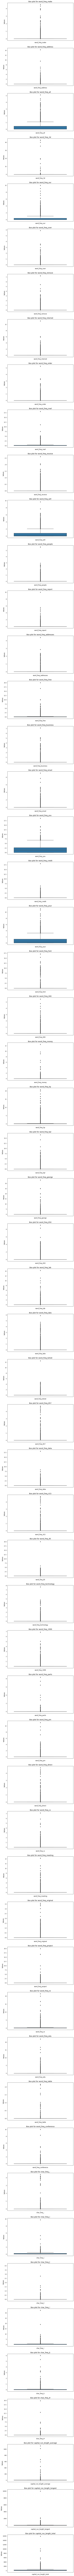

In [11]:
# Check for outliers in the numerical variables using box plots

# plot histograms to see the distributions of values in each numerical variable
numerical = mail.drop('spam', axis=1 )
col_names= numerical.columns

fig, ax = plt.subplots(len(col_names), figsize=(10,400))

# Plot boxplots for each variable
for i, col_val in enumerate(numerical):

    sns.boxplot(y=mail[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)
    ax[i].set_ylabel('Values', fontsize=12)

Since all the outliers represent accurate data, there are no justifiable reasons to drop them; for this reason, they will be retained. Furthermore, removing them will lead to the loss of a substantial amount of data.

In [12]:
# Identify anomalies in the categorical variable by checking its unique values 
mail.spam.unique()

array([1, 0])

There are no anomalies in of the 'spam' column

In [13]:
# Check the shape of the train and test sets after cleaning
print(f'The shape of the dataset after cleaning is: {mail.shape}')

The shape of the dataset after cleaning is: (4210, 58)


## Descriptive statistics

### Univariate analysis  
Univariate analysis will help us gain insights on the characteristics of each variable

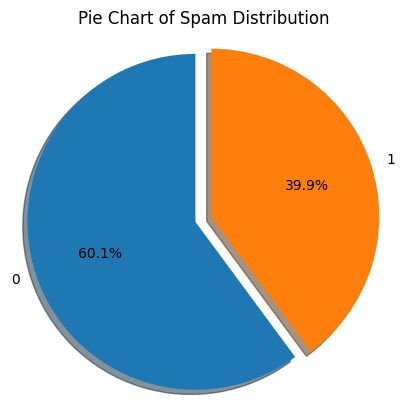

In [14]:
# Create a pie chart of the percentage of count of values in 'spam' column

# Find the count of values of the elements in 'bank_account' column
spam_count = mail.spam.value_counts()
spam_count

# Assign the colums to 'element' and 'size' variables
element = spam_count.values
size = spam_count.index

# Plot the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Spam Distribution')
plt.show()

* The proportion of ham mail is larger than the proportion of spam mail

In [15]:
# Compute the general statistical summaries of the  numerical variables
print(f'The statistical summaries of the numerical variables are as follows:\n{numerical.describe().T}\n')

# Compute the skewness of the values in the variables in each set
print(f'The skewness of the values in each numerical variable in the dataset is as follows:\n{numerical.skew()}\n')

# Compute the kurtosis of the values in the variables in each set
print(f'The kurtosis of the values in each numerical variable in the dataset is as follows:\n{numerical.kurt()}')


The statistical summaries of the numerical variables are as follows:
                             count   mean    std  ...    50%    75%      max
word_freq_make             4210.00   0.10   0.30  ...   0.00   0.00     4.54
word_freq_address          4210.00   0.11   0.45  ...   0.00   0.00    14.28
word_freq_all              4210.00   0.29   0.52  ...   0.00   0.44     5.10
word_freq_3d               4210.00   0.06   1.35  ...   0.00   0.00    42.81
word_freq_our              4210.00   0.33   0.69  ...   0.00   0.41    10.00
word_freq_over             4210.00   0.10   0.28  ...   0.00   0.00     5.88
word_freq_remove           4210.00   0.12   0.40  ...   0.00   0.00     7.27
word_freq_internet         4210.00   0.11   0.41  ...   0.00   0.00    11.11
word_freq_order            4210.00   0.09   0.28  ...   0.00   0.00     5.26
word_freq_mail             4210.00   0.25   0.66  ...   0.00   0.19    18.18
word_freq_receive          4210.00   0.06   0.18  ...   0.00   0.00     2.61
word_fr

* All the variables are leptokurtic and highly skewed to the right
* We will plot histograms to visualize the distributions of the variables

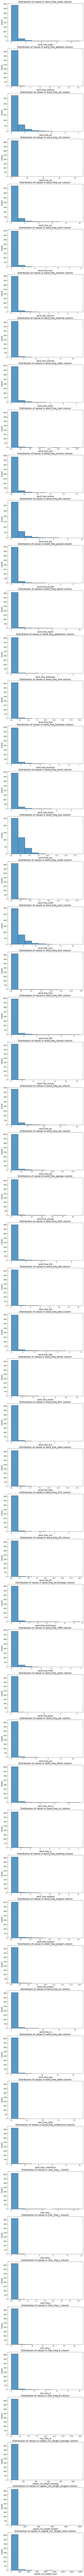

In [17]:
# Plot histograms to see the distributions of values in each numerical variable (train set)
col_names= numerical.columns

# Set the size of the figure
fig, ax = plt.subplots(len(col_names), figsize=(10,350))

# Plot the histograms
for i, col_val in enumerate(col_names):
    sns.histplot(mail[col_val], bins=10, ax=ax[i])
    ax[i].set_title('Distribution of values in {} column '.format(col_val), fontsize=16)
    ax[i].set_xlabel(col_val, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)

* All the variables are highly skewed to the right

### Bivariate analysis
Bivariate analysis will enable us to establish the relationship between two variables

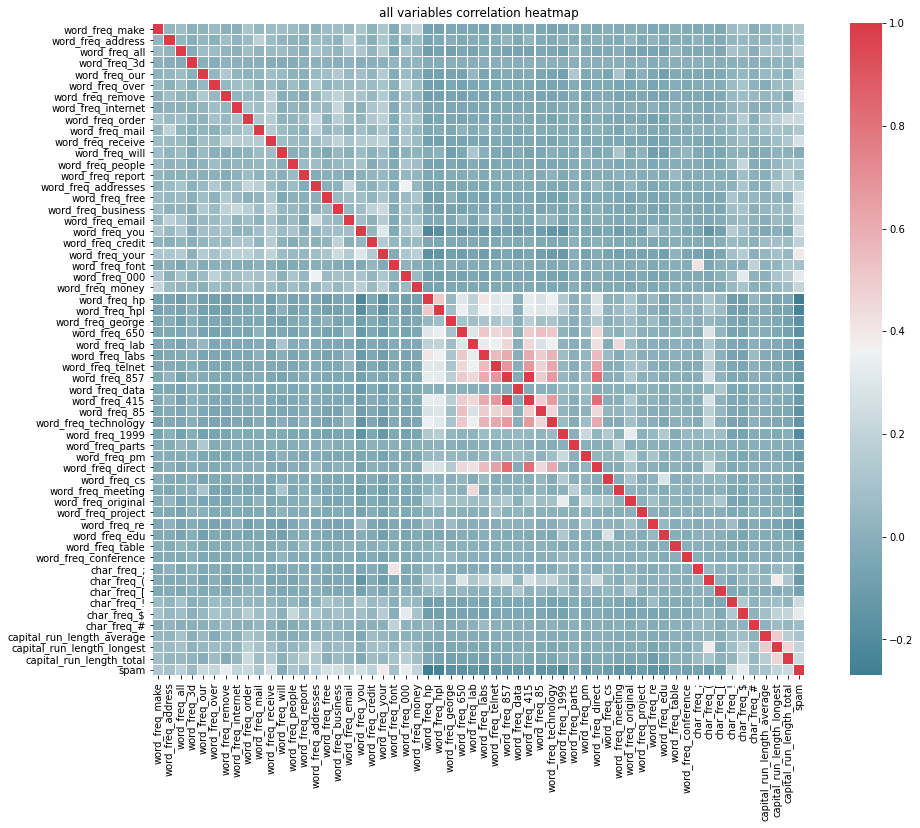

In [26]:
# Calculate the pearson correlation of the numerical variables

corr=mail.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="all variables correlation heatmap");


There seem to be a correlation between word_freq_857 and word_freq_415, word_freq_857 and word_freq_direct, word_freq_direct and word_freq_415

## Predictive analysis  
Naive bayes classification  

We will build a gaussian naive bayes model to predict whether the some individuals died or survived depending on the data given in the test set.  
Before building the model we need to check for multicollinearity as its presence may affect the performance of the model

### Multicollinearity check

In [27]:
# Compute the VIF scores of the independent variables to check for multicollinearity

# Specify the independent variables
independent = mail.drop('spam', axis=1)

# Compute the correlation coefficients of the variables
correlation = independent.corr()

# Compute and display the VIF scores
VIF = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)
VIF

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.10,-0.00,-0.02,-0.00,0.01,-0.01,0.04,0.05,-0.06,-0.01,-0.00,-0.07,-0.02,-0.01,0.05,-0.03,-0.05,-0.02,-0.05,0.02,-0.04,0.02,-0.11,-0.18,0.02,0.01,0.02,0.00,0.03,0.02,-0.00,0.46,0.02,-0.54,0.01,0.03,0.03,0.00,-0.02,0.04,-0.02,-0.00,-0.01,0.01,0.01,0.02,0.00,0.01,0.01,-0.01,0.02,-0.02,-0.02,0.01,-0.03,0.01,-0.04
word_freq_address,-0.00,1.11,0.00,0.02,-0.01,0.02,-0.04,0.01,-0.01,-0.19,0.00,-0.03,0.01,-0.01,0.01,-0.01,0.02,-0.20,0.02,0.03,-0.07,0.01,0.04,-0.03,0.03,0.02,-0.00,0.03,0.02,0.05,0.03,-0.52,0.01,0.28,0.01,0.05,-0.03,0.01,0.02,0.07,0.01,0.01,-0.04,0.02,-0.04,0.01,0.02,0.01,-0.03,0.04,0.02,-0.01,-0.02,-0.03,0.00,-0.04,-0.01
word_freq_all,-0.02,0.00,1.09,0.02,-0.02,-0.02,0.02,0.03,-0.02,0.02,0.00,-0.05,-0.00,0.01,-0.06,-0.03,0.03,-0.06,-0.07,-0.00,-0.09,0.04,-0.05,0.03,0.05,0.00,0.05,0.01,0.05,-0.06,-0.03,-0.08,0.04,0.11,0.02,-0.02,0.02,-0.03,-0.02,0.02,-0.00,-0.03,0.02,0.05,0.04,0.04,-0.03,0.02,0.01,-0.01,0.01,-0.07,0.00,0.01,-0.09,-0.01,-0.01
word_freq_3d,-0.00,0.02,0.02,1.01,0.00,0.02,-0.01,-0.00,0.01,0.00,0.02,0.02,0.02,-0.00,0.00,0.00,0.01,-0.02,0.02,0.01,-0.00,-0.03,-0.01,-0.03,0.01,0.01,0.01,0.00,-0.00,0.00,0.00,-0.03,0.01,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.02,0.03,0.01,0.01,-0.00,0.01,0.01,-0.04,-0.01
word_freq_our,0.01,-0.01,-0.02,0.00,1.11,-0.01,-0.09,0.02,0.04,0.00,-0.02,-0.02,-0.00,0.00,-0.03,-0.04,-0.11,-0.01,-0.03,0.02,-0.09,0.02,-0.02,0.04,0.02,0.04,0.05,0.02,-0.03,0.01,0.02,-0.13,0.02,0.05,0.02,0.02,0.02,-0.13,0.02,0.01,0.01,-0.10,0.02,-0.02,0.03,0.06,0.03,0.02,0.01,0.03,0.00,0.02,0.00,0.00,-0.04,-0.03,0.04
word_freq_over,-0.01,0.02,-0.02,0.02,-0.01,1.08,-0.01,-0.05,-0.04,0.04,0.00,0.01,-0.03,0.01,-0.08,0.02,0.00,-0.01,-0.02,-0.03,-0.03,-0.01,-0.12,-0.02,0.03,0.04,0.02,0.02,0.00,-0.02,0.01,-0.10,0.02,0.05,0.02,0.01,0.01,0.01,0.02,0.03,0.01,0.03,0.00,0.02,0.04,0.02,0.01,0.02,0.02,-0.01,0.00,-0.03,-0.02,-0.02,0.05,-0.04,0.01
word_freq_remove,0.04,-0.04,0.02,-0.01,-0.09,-0.01,1.13,0.05,0.01,-0.01,-0.14,0.04,0.04,0.03,0.01,-0.09,-0.15,-0.08,-0.03,0.01,-0.03,0.00,-0.02,0.01,0.04,0.01,0.04,0.02,0.00,0.02,0.01,-0.11,0.02,0.08,0.01,0.01,-0.00,0.02,0.01,-0.03,-0.00,0.04,0.02,0.03,0.04,0.04,0.01,0.02,0.02,0.05,0.01,-0.00,-0.03,-0.05,-0.01,-0.07,0.09
word_freq_internet,0.05,0.01,0.03,-0.00,0.02,-0.05,0.05,1.11,-0.03,-0.04,-0.10,0.03,-0.00,0.01,-0.03,-0.03,-0.18,0.01,0.07,-0.05,-0.12,0.02,-0.04,-0.01,0.03,-0.01,0.03,0.02,-0.00,0.02,0.00,-0.03,0.03,0.06,-0.01,-0.01,-0.00,0.00,0.01,-0.04,-0.03,0.02,-0.02,0.02,-0.03,0.03,0.00,0.01,0.01,0.03,0.02,0.00,0.00,0.01,0.01,-0.01,0.01
word_freq_order,-0.06,-0.01,-0.02,0.01,0.04,-0.04,0.01,-0.03,1.19,-0.05,-0.08,0.01,0.05,-0.03,-0.19,0.04,-0.11,-0.00,0.05,-0.06,-0.09,0.05,0.05,-0.05,0.04,-0.01,0.01,0.00,-0.00,-0.02,0.00,-0.16,-0.00,0.12,0.01,0.05,-0.01,-0.01,0.00,-0.01,0.01,0.02,0.03,0.02,0.03,0.03,-0.01,0.01,-0.01,0.07,-0.04,0.00,-0.08,0.00,-0.06,-0.02,-0.18
word_freq_mail,-0.01,-0.19,0.02,0.00,0.00,0.04,-0.01,-0.04,-0.05,1.12,-0.11,-0.05,-0.01,0.00,-0.15,0.00,-0.03,0.09,-0.05,0.01,-0.03,0.00,-0.02,-0.00,0.03,-0.01,0.02,-0.09,0.

The scores are within acceptable ranges, therefore, there is no need for dropping any variable

### Modelling

In [29]:
# Data preparation

# Divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = mail.drop(['spam'], axis=1)
y = mail["spam"]

# Feature Scaling

# Scale the features so they can have relatively normal distributions and so that they can all be uniformly evaluated
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

Since the features contain continuous data that has been normalized, we will use gaussian naive bayes classifier 

#### 80-20 split

In [30]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# The script above splits 80% of the data to training set and 20% of the data to test set

In [31]:
# Traning the algorithm and making predictions

# Instantiate gaussian naive bayes classifier 
clf = GaussianNB()# use default values of the other parameters

# Fit the model to the training data
clf.fit(X_train, y_train)

# Generate predictions based on the given test data
y_pred = clf.predict(X_test)

In [32]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}\n')


Accuracy: 80.88%
Confusion matrix:
[[374 148]
 [ 13 307]]



In [33]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82       522
           1       0.67      0.96      0.79       320

    accuracy                           0.81       842
   macro avg       0.82      0.84      0.81       842
weighted avg       0.86      0.81      0.81       842



Using the 80-20 split the model is able to predict 80.88% of the data correctly.  
The classification report shows that the model has been able to predict 72% of the ham cases  and 96% of the spam cases correctly.
The precision in predicting ham cases is 97% while the precision in predicting spam cases is 67%

#### 70-30 split

In [35]:
# Split the data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=30)
# The script above splits 70% of the data to training set and 30% of the data to test set

In [36]:
# Traning the algorithm and making predictions

# Instantiate gaussian naive bayes classifier 
clf = GaussianNB()# use default values of the other parameters

# Fit the model to the training data
clf.fit(X_train1, y_train1)

# Generate predictions based on the given test data
y_pred1 = clf.predict(X_test1)

In [37]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy1 = accuracy_score(y_test1, y_pred1)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy1)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test1, y_pred1)}\n')


Accuracy: 81.16%
Confusion matrix:
[[563 218]
 [ 20 462]]



In [38]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.72      0.83       781
           1       0.68      0.96      0.80       482

    accuracy                           0.81      1263
   macro avg       0.82      0.84      0.81      1263
weighted avg       0.86      0.81      0.81      1263



Using the 70-30 split the model is able to predict 81.16% of the data correctly.  
The classification report shows that the model has been able to predict 72% of the ham cases  and 96% of the spam cases correctly.  
The precision in predicting death cases is 97% while the precision in predicting survival cases is 68%

#### 60-40 split

In [43]:
# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=30)
# The script above splits 60% of the data to training set and 40% of the data to test set

In [44]:
# Traning the algorithm and making predictions

# Instantiate gaussian naive bayes classifier 
clf = GaussianNB()# use default values of the other parameters

# Fit the model to the training data
clf.fit(X_train2, y_train2)

# Generate predictions based on the given test data
y_pred2 = clf.predict(X_test2)

In [45]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy2 = accuracy_score(y_test2, y_pred2)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy2)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test2, y_pred2)}\n')


Accuracy: 81.95%
Confusion matrix:
[[755 268]
 [ 36 625]]



In [46]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83      1023
           1       0.70      0.95      0.80       661

    accuracy                           0.82      1684
   macro avg       0.83      0.84      0.82      1684
weighted avg       0.85      0.82      0.82      1684



Using the 60-40 split the model is able to predict 81.95% of the data correctly.  
The classification report shows that the model has been able to predict 74% of the ham cases  and 95% of the spam cases correctly.
The precision in predicting ham cases is 95% while the precision in predicting survival cases is 70%

### Optimizing model performance
The performance of gaussian naive bayes models can be improved by doing the following:
* Normalizing the features in the dataset dataset.
* Removing redundant/correlated features as part of feature selection. 
* Performing thorough data preprocessing on both our train and test dataset if separate.
* Applying smoothing techniques.  

Since we have already normalized our data, we will remove redundant features to see how the model fairs, using the 60-40 split data.

In [84]:
# Create correlation matrix
corr_matrix = mail.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.60)]

In [85]:
# Drop features 
mail_drop=mail.drop(mail[to_drop], axis=1,)

In [86]:
# Data preparation

# Divide the data into "attributes" and "labels" by assigning the attributes to variable X and the label to variable y 
X = mail_drop.drop(['spam'], axis=1)
y = mail_drop["spam"]

# Feature Scaling

# Scale the features so they can have relatively normal distributions and so that they can all be uniformly evaluated
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [87]:
# Split the data into training and test sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.4, random_state=30)
# The script above splits 60% of the data to training set and 40% of the data to test set

In [88]:
# Traning the algorithm and making predictions

# Instantiate gaussian naive bayes classifier 
clf = GaussianNB()# use default values of the other parameters

# Fit the model to the training data
clf.fit(X_train3, y_train3)

# Generate predictions based on the given test data
y_pred3 = clf.predict(X_test3)

In [93]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy3 = accuracy_score(y_test3, y_pred3)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy3)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test3, y_pred3)}\n')

# Print out the accuracy difference between the first model and the model with reduced features
print('Improvement:  {:0.2f}%.'.format( 100 * (accuracy3 - accuracy2)))

Accuracy: 83.02%
Confusion matrix:
[[774 249]
 [ 37 624]]

Improvement:  1.07%.


In [91]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      1023
           1       0.71      0.94      0.81       661

    accuracy                           0.83      1684
   macro avg       0.83      0.85      0.83      1684
weighted avg       0.86      0.83      0.83      1684



After dropping redundant features (features with pearson coefficients of 0.6 and above) the model is able to predict 83.02% of the data correctly (improvement of 1.07%).  
The classification report shows that the model has been able to predict 76% of the ham cases  and 94% of the spam cases correctly.
The precision in predicting ham cases is 95% while the precision in predicting survival cases is 71%

## Challenging the solution  
We will challenge the solution by balancing the classes in the train set before fitting the algorithm 

In [97]:
smote = SMOTE(random_state =0)
X_train4, y_train4 = smote.fit_resample(X_train3, y_train3)

In [99]:
# Traning the algorithm and making predictions

# Instantiate gaussian naive bayes classifier 
clf = GaussianNB()# use default values of the other parameters

# Fit the model to the training data
clf.fit(X_train4, y_train4)

# Generate predictions based on the given test data
y_pred4 = clf.predict(X_test3)

In [101]:
# Evaluating the model

# Use accuracy_score function to compute the accuracy of the algorithm by finding the proportion of correct predictions
accuracy4 = accuracy_score(y_test3, y_pred4)

# Print the accuracy value
print('Accuracy: {:0.2f}%' .format(100*(accuracy4)))

# Print the cofusion matrix
print(f'Confusion matrix:\n{confusion_matrix(y_test3, y_pred4)}\n')

# Print out the accuracy difference between the first model and the model with reduced features
print('Improvement:  {:0.2f}%.'.format( 100 * (accuracy4 - accuracy3)))

Accuracy: 83.31%
Confusion matrix:
[[781 242]
 [ 39 622]]

Improvement:  0.30%.


In [102]:
# Classification report

# Generate the classification report to further evaluate the performance of the model
print(classification_report(y_test3, y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      1023
           1       0.72      0.94      0.82       661

    accuracy                           0.83      1684
   macro avg       0.84      0.85      0.83      1684
weighted avg       0.86      0.83      0.84      1684



After balancing the classes in the train set, the model's accuracy score improved by 0.31% to be 83.31%.   
The classification report shows that the model has been able to predict 76% of the ham cases  and 94% of the spam cases correctly. (This is not different from the previous model)
The precision in predicting ham cases is 95% while the precision in predicting survival cases is 72%. (An improvement of 1% for spam cases)

## **Conclusions**  
* The gaussian naive bayes model has done a good job predicting the type of an emal
* The 60-40 split model has performed better than the other two
* The different optimization techniques (removal of redundant variables and balancing of classes), have positively impacted the performance of the model
* The last model (after optimization) performed better than all the other models
* The project can be considered successful as the models performance is above the set metric for success

## **Recommendations**
* The model could be optimized further by performing more thorough data preprocessing on both the train and test sets and by applying smoothing techniques.